<a href="https://colab.research.google.com/github/EeraboinaKeerthi/Supervised_Learning/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# List the main "My Drive" folder
print(os.listdir('/content/drive/My Drive/'))

['Colab Notebooks', 'datasets']


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/datasets/LoanFlag/test_task.csv')


In [4]:
data.shape

(4157, 22)

In [5]:
data.sample(n=10, random_state=42)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
2481,798820,2016-11-07,2015-09-07,NaN,NaN,NaN,NaN,7.0,region_3,6,...,16,0,0,0,14.0,550.235369,NaN,43.0,False,0
308,612648,2016-08-18,2016-02-08,NaN,NaN,NaN,NaN,1.0,region_6,12,...,0,2,0,0,6.0,NaN,576.875277,26.0,False,0
2414,452498,2016-04-20,2016-03-12,NaN,NaN,NaN,NaN,0.0,region_2,12,...,0,2,1,0,1.0,561.999471,NaN,28.0,True,1
2720,580963,2016-07-22,2015-08-14,NaN,NaN,NaN,NaN,1.0,region_6,26,...,5,6,0,0,10.0,590.376406,NaN,30.0,False,0
463,518998,2016-06-01,2015-09-29,NaN,NaN,NaN,NaN,1.0,region_3,6,...,8,0,0,0,8.0,593.493342,NaN,47.0,False,0
1185,295047,2015-12-23,2015-12-22,NaN,NaN,NaN,NaN,NaN,region_2,6,...,0,0,0,0,NaN,NaN,NaN,19.0,False,0
96,247067,2015-11-17,2015-10-15,NaN,NaN,NaN,NaN,0.0,region_3,12,...,0,0,0,0,1.0,601.979112,NaN,27.0,False,1
2031,388069,2016-03-16,2015-10-10,NaN,NaN,NaN,NaN,1.0,region_3,6,...,2,0,0,0,3.0,NaN,NaN,24.0,False,0
1886,736698,2016-10-16,2015-10-16,2.0,1.0,0.0,2015-12-20,2.0,region_6,6,...,5,0,0,0,5.0,NaN,NaN,20.0,False,1
843,628262,2016-08-28,2015-08-08,NaN,NaN,NaN,NaN,1.0,region_3,38,...,3,0,0,0,3.0,634.387608,NaN,46.0,False,0


In [6]:
# prints number of non-null values and type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

| bad_flag |                                 |
| ---------- | ----------------------------- |
| `0`        | Good loan — repaid or current |
| `1`        | Bad loan — defaulted or risky |


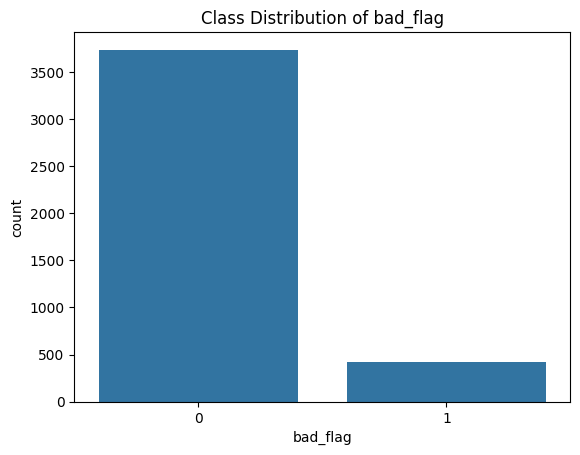

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='bad_flag')
plt.title("Class Distribution of bad_flag")
plt.show()


**Numerical Columns**

In [8]:
data[[
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "payment_type_5",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age"
]].describe()

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age
count,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000
mean,1.444444,0.733333,0.280000,1.184693,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222
std,0.900599,0.764572,0.502339,1.723715,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000
75%,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000
max,7.000000,5.000000,3.000000,31.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000


**Categorical Columns**

In [9]:
data[[
    "federal_district_nm",
    "gender"
]].describe()

,federal_district_nm,gender
count,4146,4157
unique,8,2
top,region_3,False
freq,1595,3570


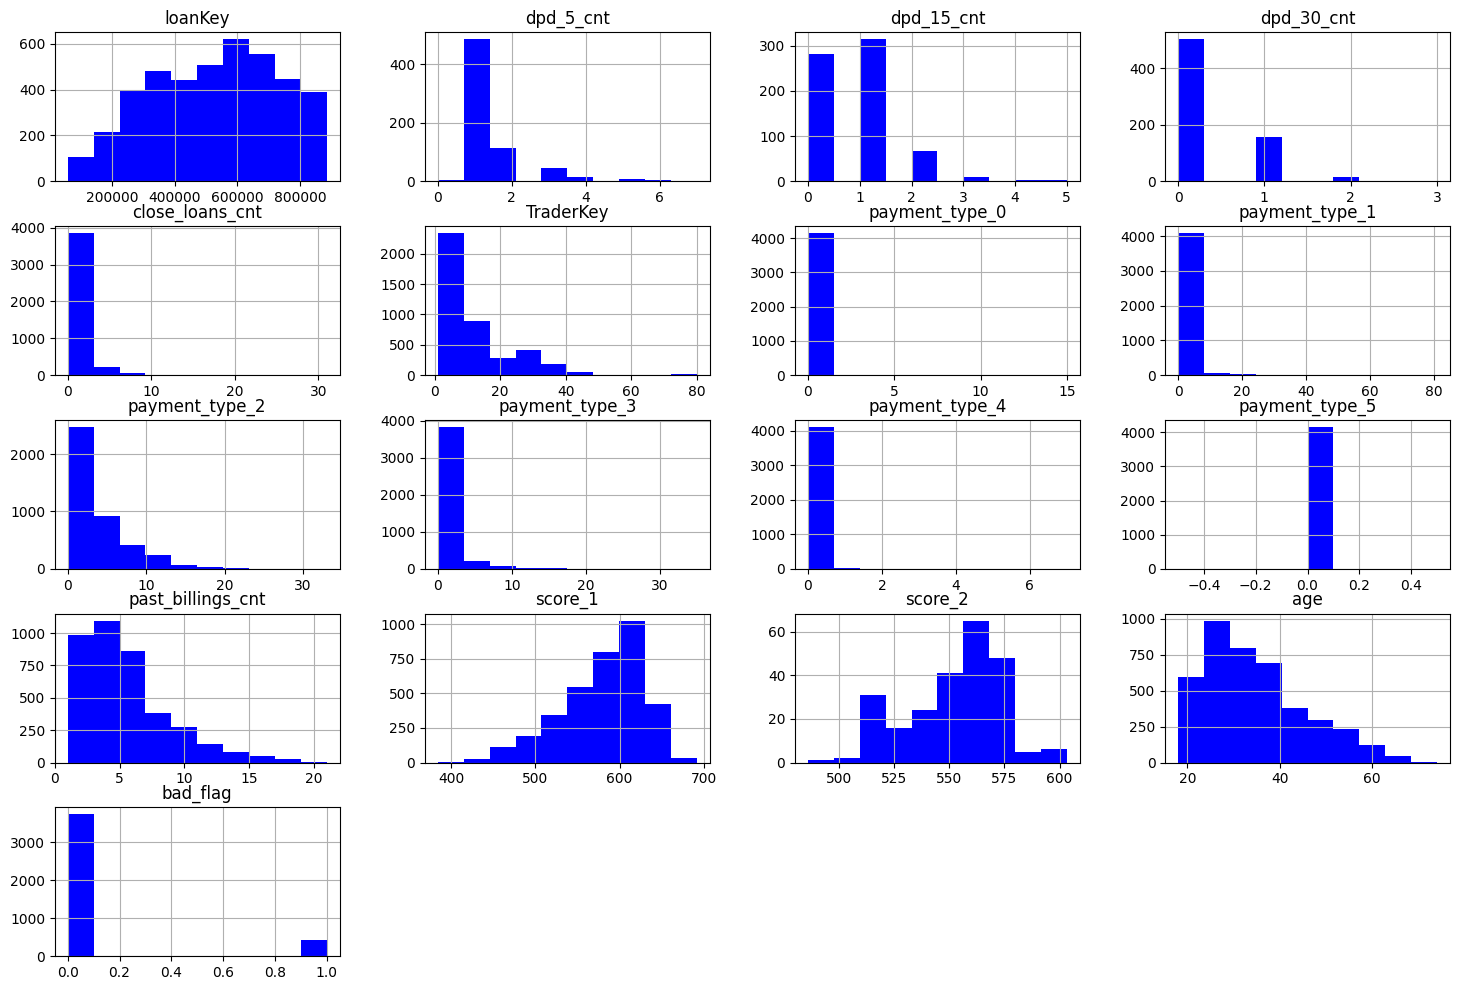

In [10]:
_ = data.hist(figsize=(18, 12), color="blue")

<Axes: xlabel='bad_flag', ylabel='score_1'>

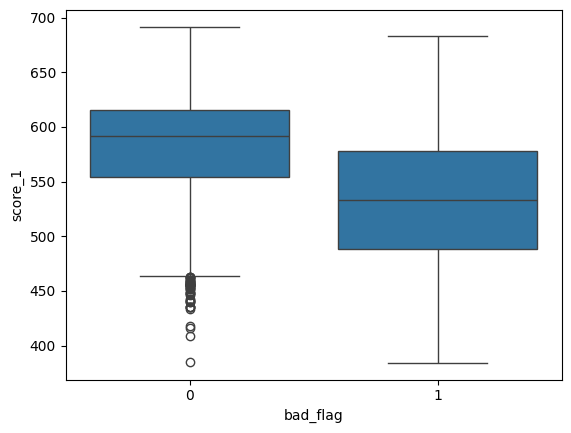

In [11]:
import seaborn as sns
sns.boxplot(x='bad_flag', y='score_1', data=data)


Higher score_1 values are associated with better loans (bad_flag = 0), and lower scores are associated with default (bad_flag = 1).



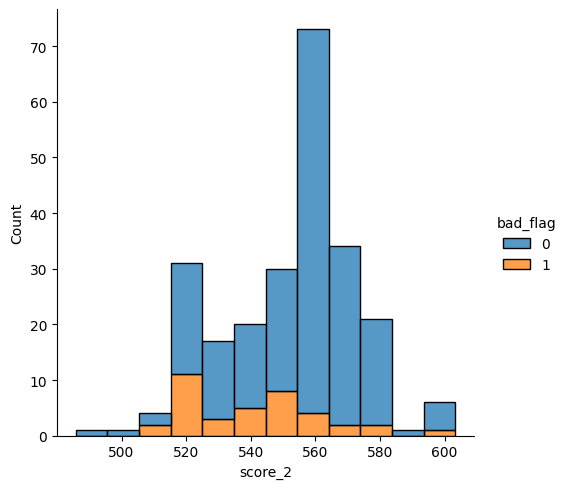

In [12]:
from seaborn import displot

_ = displot(data=data, x="score_2", hue="bad_flag", multiple="stack")

#Feature Engineering



In [13]:
# calculate difference in days between the first and the repeated loan
data[["rep_loan_date", "first_loan"]] = data[["rep_loan_date", "first_loan"]].apply(pd.to_datetime)
data["days_between_rep_and_first_loan"] = (data["rep_loan_date"] - data["first_loan"]).dt.days


In [14]:
data

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag,days_between_rep_and_first_loan
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,0,0,0,10.0,NaN,NaN,21.0,False,0,328
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,0,0,0,5.0,NaN,NaN,20.0,False,0,180
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,5,0,0,5.0,NaN,NaN,19.0,False,0,314
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,0,0,0,6.0,NaN,NaN,21.0,False,0,365
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,3.0,NaN,NaN,33.0,False,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,NaN,NaN,NaN,NaN,0.0,region_5,7,...,0,0,0,NaN,NaN,563.089780,26.0,False,0,25
4153,596156,2016-08-06,2016-03-11,NaN,NaN,NaN,NaN,1.0,region_2,12,...,0,0,0,3.0,NaN,576.875277,38.0,False,1,148
4154,645359,2016-09-05,2016-04-30,NaN,NaN,NaN,NaN,1.0,region_2,12,...,0,0,0,4.0,NaN,554.816921,21.0,False,0,128
4155,730681,2016-10-14,2016-05-20,NaN,NaN,NaN,NaN,0.0,region_6,7,...,0,0,0,4.0,NaN,563.089780,35.0,False,0,147


###Encode categorical Variables

In [15]:
data['gender'] = data['gender'].astype(int)

In [16]:
federal_districts = pd.get_dummies(data["federal_district_nm"], prefix="federal").astype(int)

In [17]:
federal_districts

,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
4152,0,0,0,0,0,1,0,0
4153,0,0,1,0,0,0,0,0
4154,0,0,1,0,0,0,0,0
4155,0,0,0,0,0,0,1,0


In [18]:
data = pd.concat(objs=[data, federal_districts], axis=1)

###Handling Missing values

In [19]:
# Impute missing columns with zero
data.fillna(value=0, inplace=True)

In [20]:
data.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,bad_flag,days_between_rep_and_first_loan,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,708382,2016-10-06,2015-11-13,0.0,0.0,0.0,0,3.0,region_6,6,...,0,328,0,0,0,0,0,0,1,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,0,180,0,0,0,0,0,0,1,0
2,779736,2016-10-30,2015-12-21,0.0,0.0,0.0,0,2.0,region_1,6,...,0,314,0,1,0,0,0,0,0,0
3,556376,2016-06-29,2015-06-30,0.0,0.0,0.0,0,1.0,region_6,14,...,0,365,0,0,0,0,0,0,1,0
4,266968,2015-12-01,2015-08-03,0.0,0.0,0.0,0,0.0,region_5,22,...,0,120,0,0,0,0,0,1,0,0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [22]:
# define the numerical input columns
X_columns = [
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age",
    "days_between_rep_and_first_loan",
    "gender"
]

# append to them the categorical ones
X_columns = X_columns + list(federal_districts.columns)

In [23]:
# split the data set into train and test
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=data["bad_flag"],
                                                    random_state=RANDOM_SEED)

In [24]:
classifiers = [
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=2000, random_state=RANDOM_SEED),
    LogisticRegressionCV(cv=3,max_iter=2000, random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_SEED)
]

In [25]:
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.23841059602649006
KNeighborsClassifier : 0.2018348623853211


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression : 0.044444444444444446


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegressionCV : 0.0
BaggingClassifier : 0.12612612612612611
GaussianNB : 0.22459893048128343
RandomForestClassifier : 0.18181818181818182
ExtraTreesClassifier : 0.1568627450980392


In [26]:
from yellowbrick.classifier import ClassificationReport

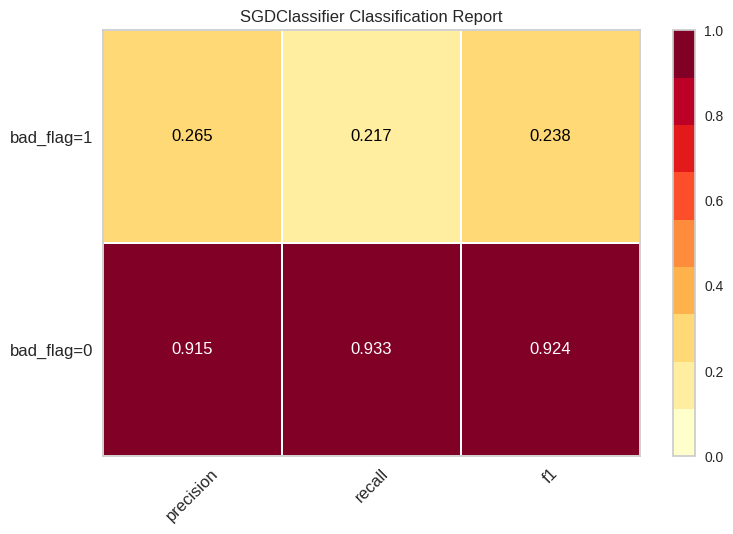

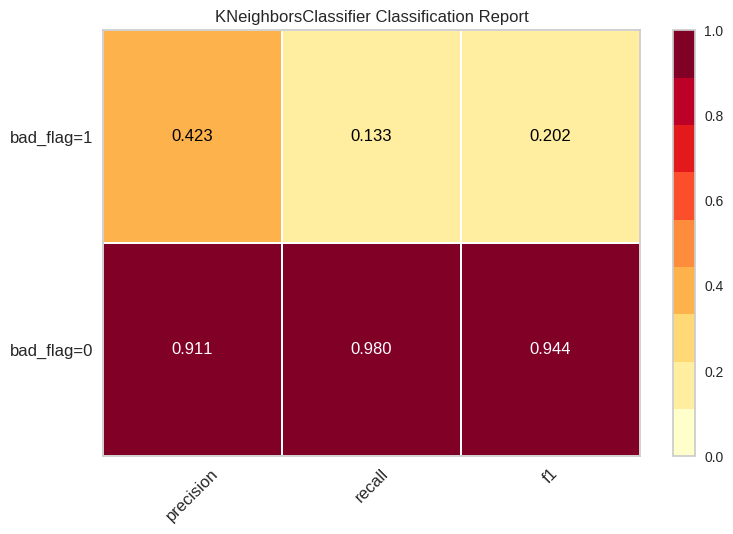

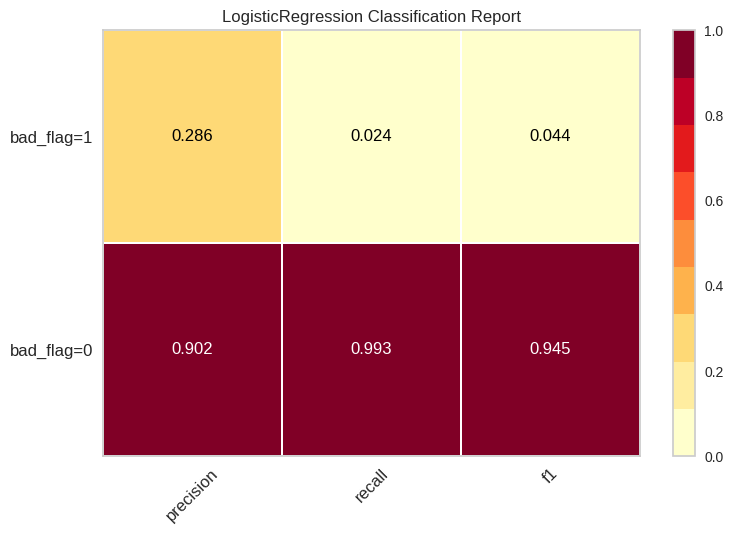

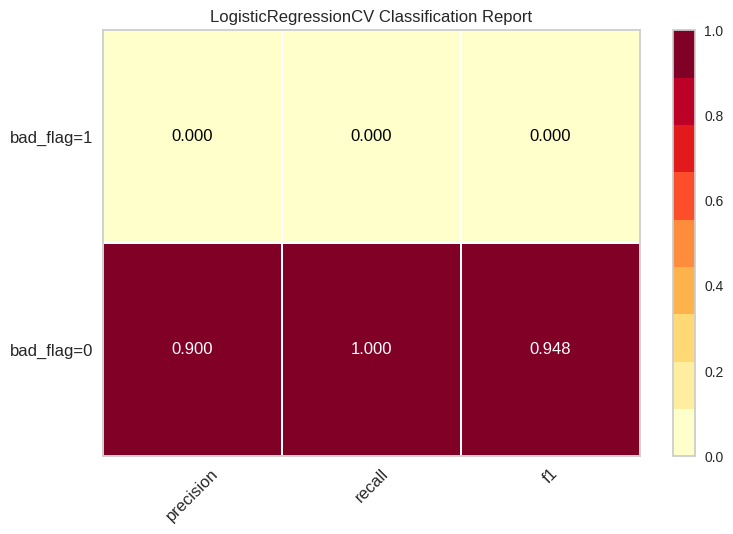

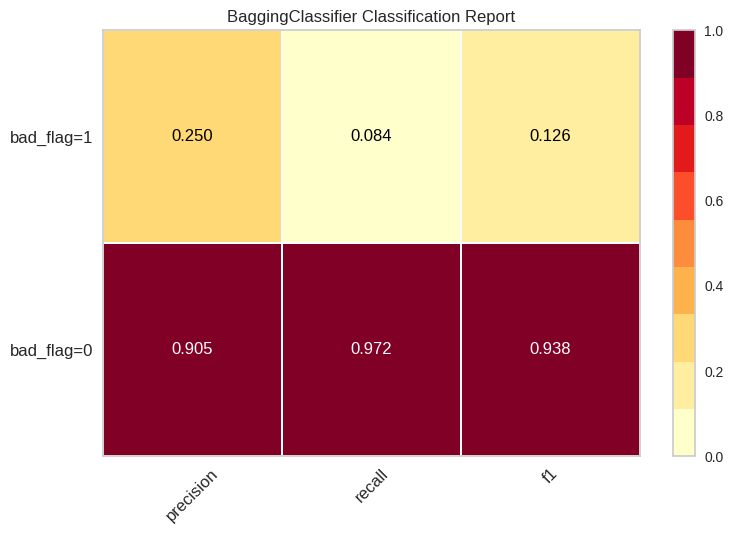

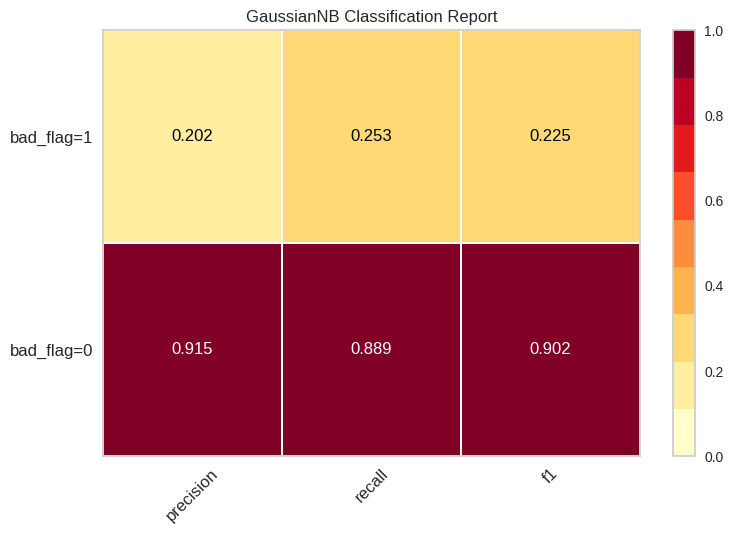

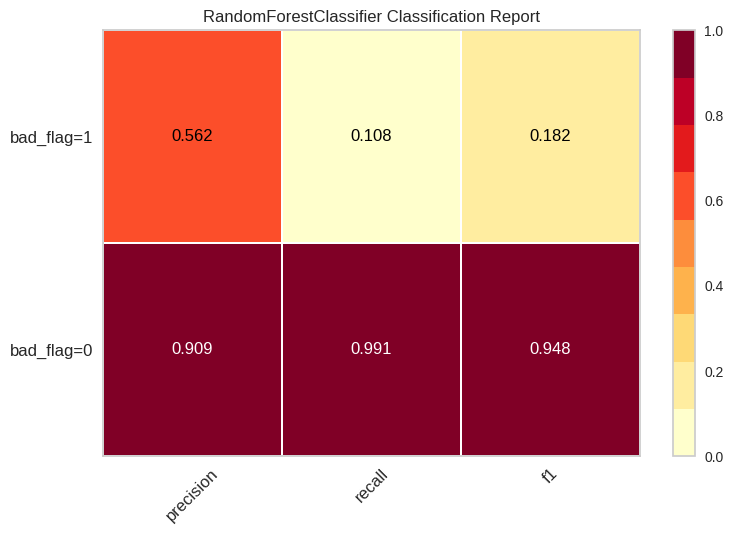

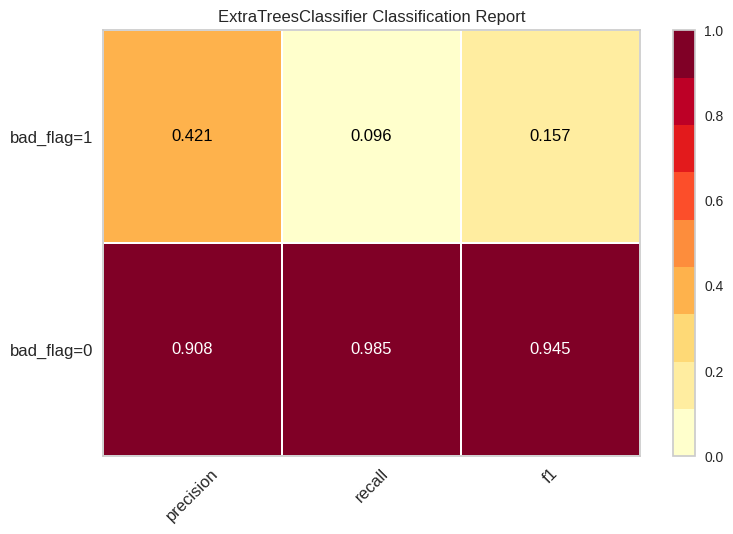

In [27]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

Handling Class Imbalance

#UnderSampling

In [28]:
## under-sampling
pos_examples = data["bad_flag"].sum()
neg_examples = data.shape[0] - pos_examples

print("Positive examples", pos_examples, ", negative examples", neg_examples)

# we keep all positive examples
pos = data[data["bad_flag"] == 1]
# we use pandas' sample method to take randomly 20% of the negative / majority class
neg = data[data["bad_flag"] == 0].sample(frac=0.2, random_state=RANDOM_SEED)

print("Negative examples after under-sampling", neg.shape[0])

# concatenating the positive and sub-sampled negative examples
data = pd.concat(objs=[pos, neg])

print("Final data shape", data.shape)

Positive examples 417 , negative examples 3740
Negative examples after under-sampling 748
Final data shape (1165, 31)


In [29]:
# perform another train / test split with the new sampled data
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=data["bad_flag"],
                                                    random_state=RANDOM_SEED)

In [30]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.5253164556962026
KNeighborsClassifier : 0.6211180124223602
LogisticRegression : 0.4892086330935252
LogisticRegressionCV : 0.46715328467153283
BaggingClassifier : 0.5769230769230769
GaussianNB : 0.42953020134228187
RandomForestClassifier : 0.5974025974025974
ExtraTreesClassifier : 0.5789473684210527


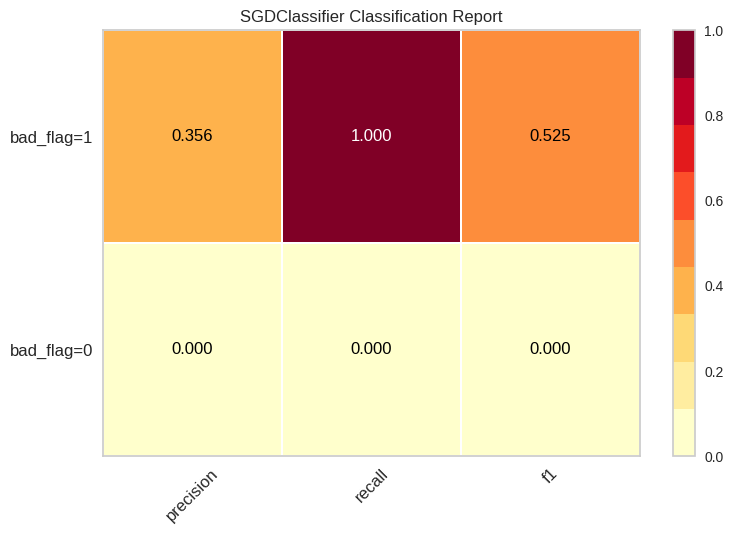

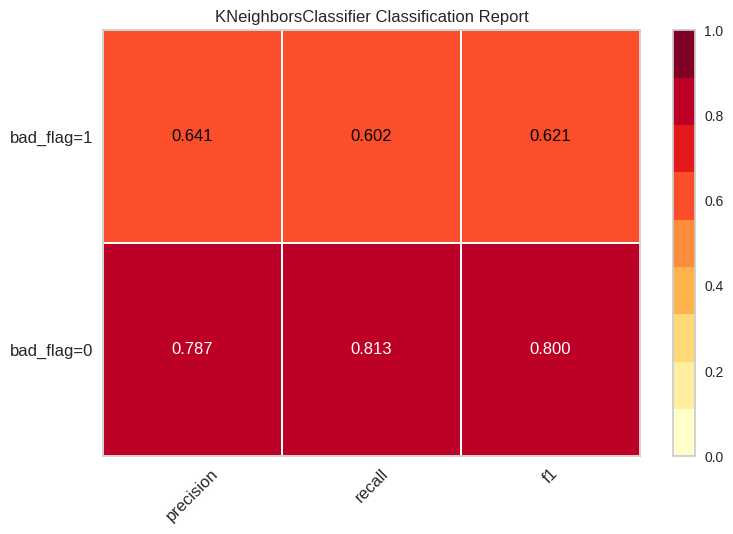

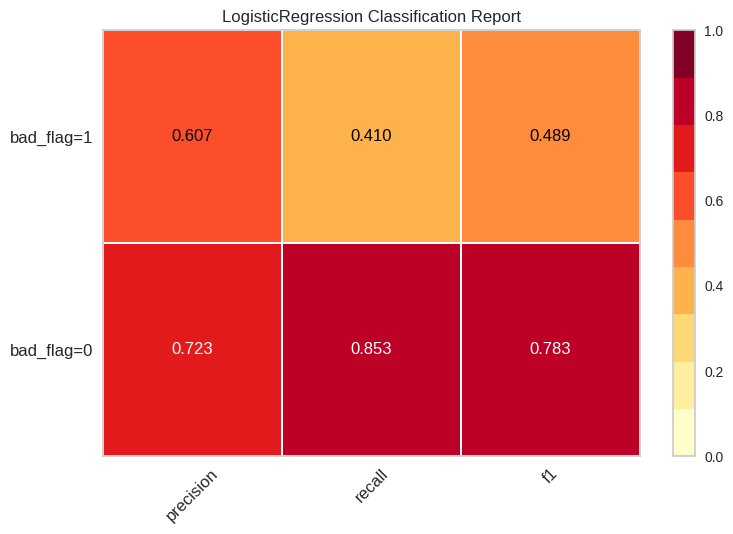

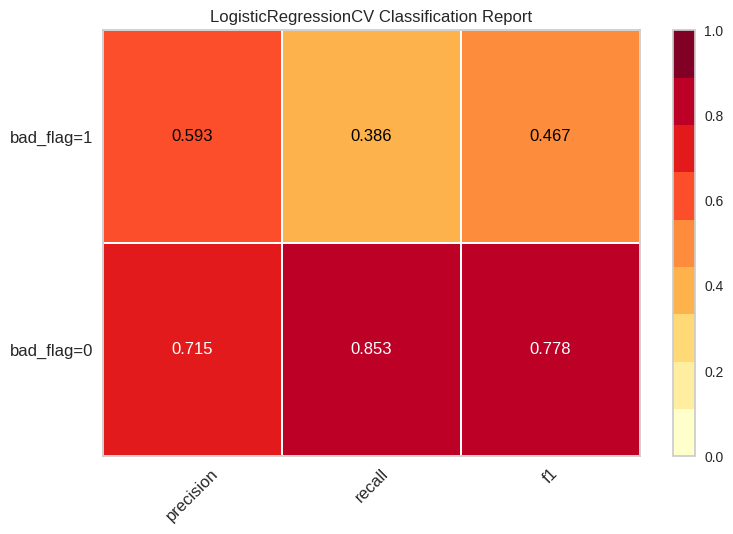

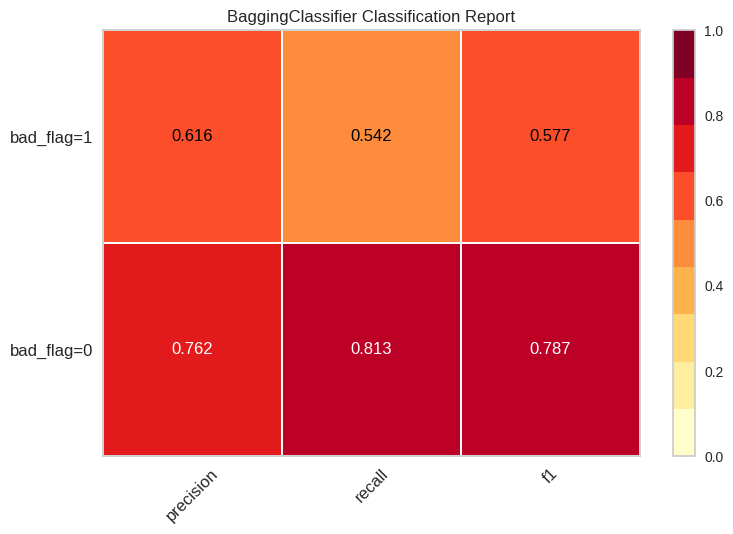

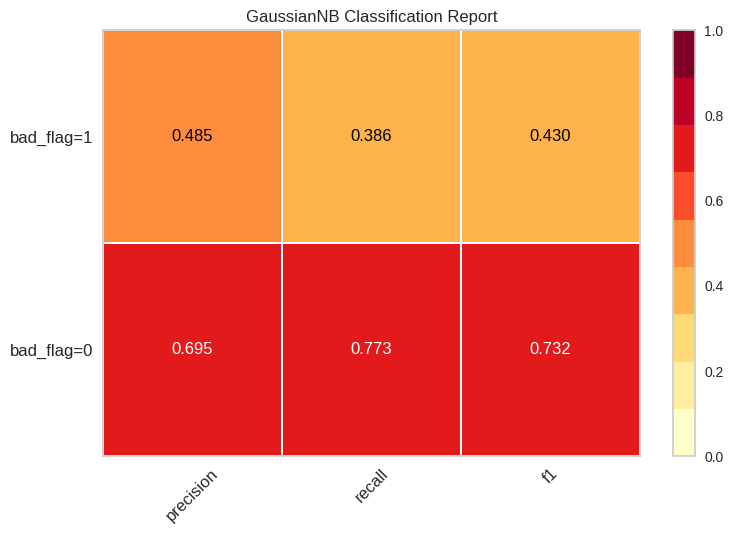

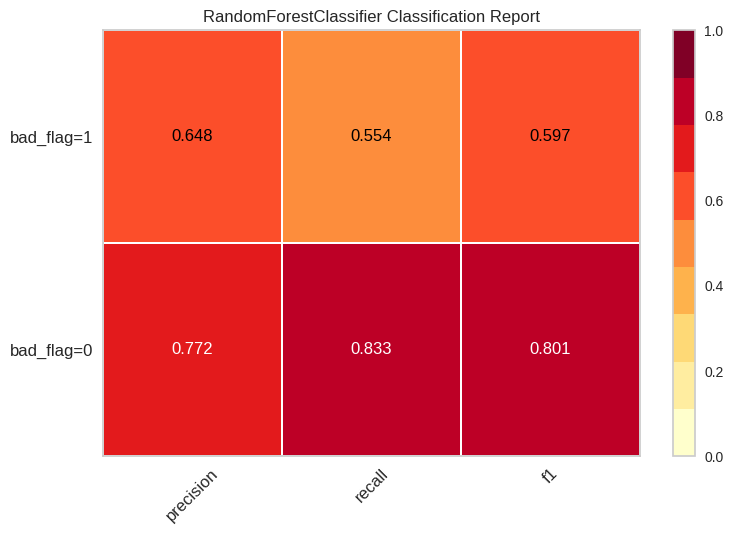

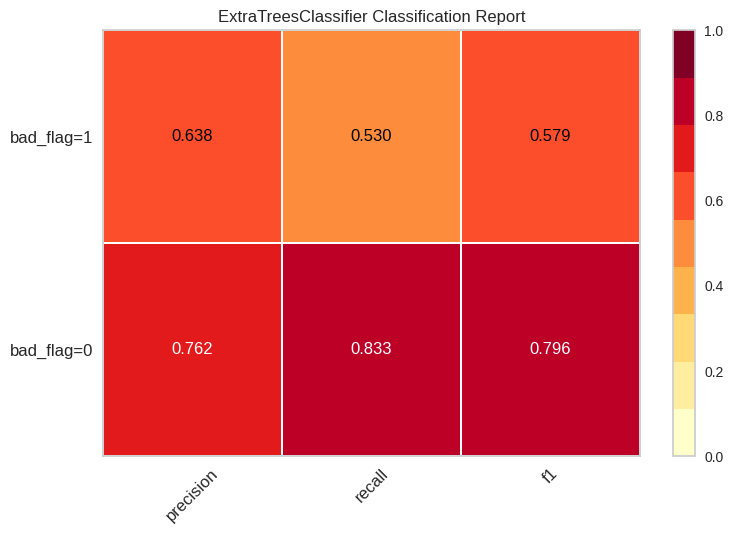

In [31]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [33]:
for classifier in classifiers:
    classifier.fit(X=X_train_sm, y=y_train_sm)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.5253164556962026
KNeighborsClassifier : 0.5803108808290155
LogisticRegression : 0.5064935064935064
LogisticRegressionCV : 0.5068493150684932
BaggingClassifier : 0.5625
GaussianNB : 0.5670103092783505
RandomForestClassifier : 0.6125
ExtraTreesClassifier : 0.5974025974025974


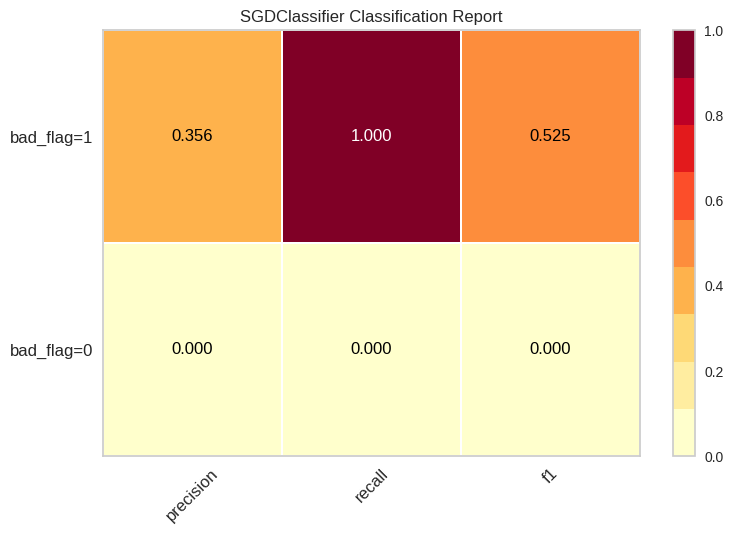

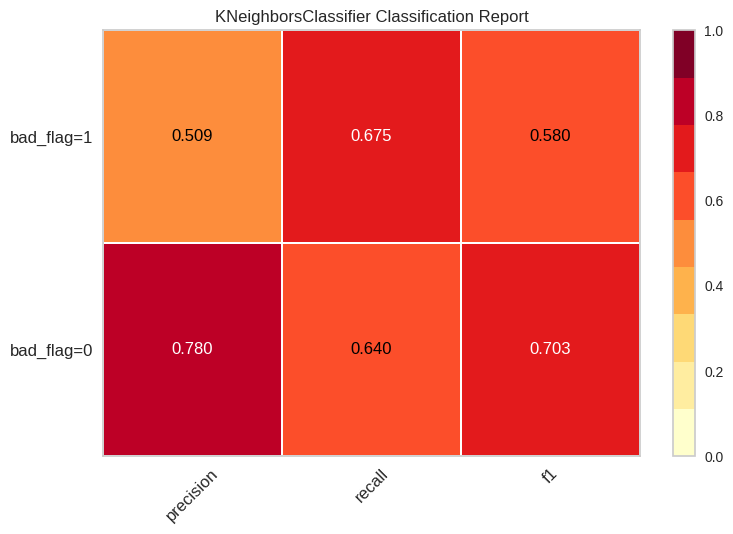

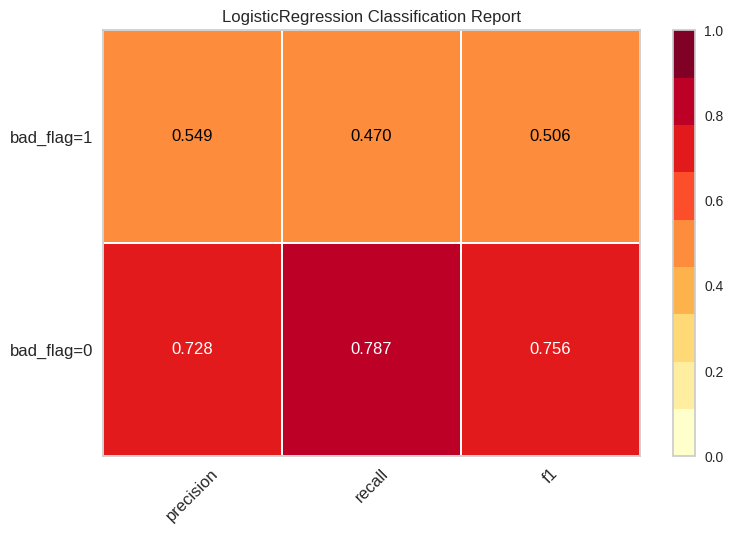

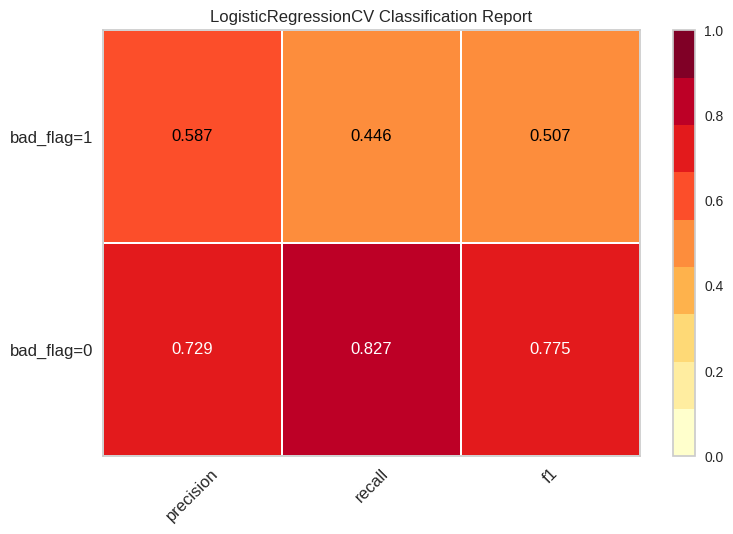

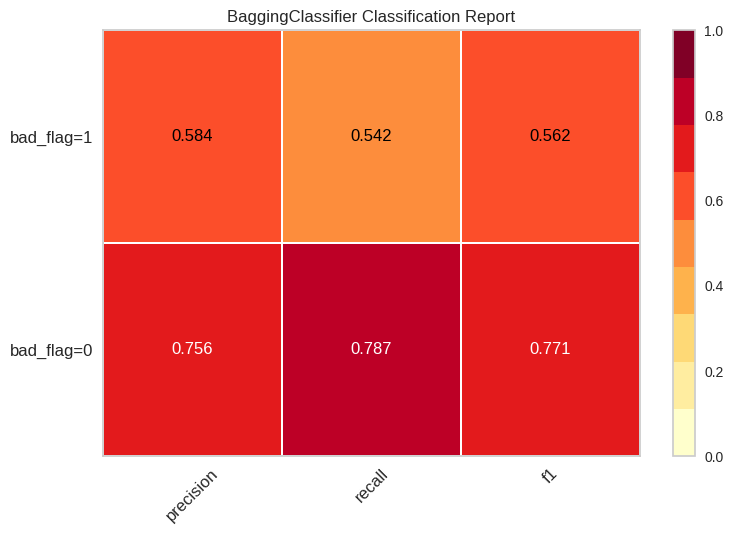

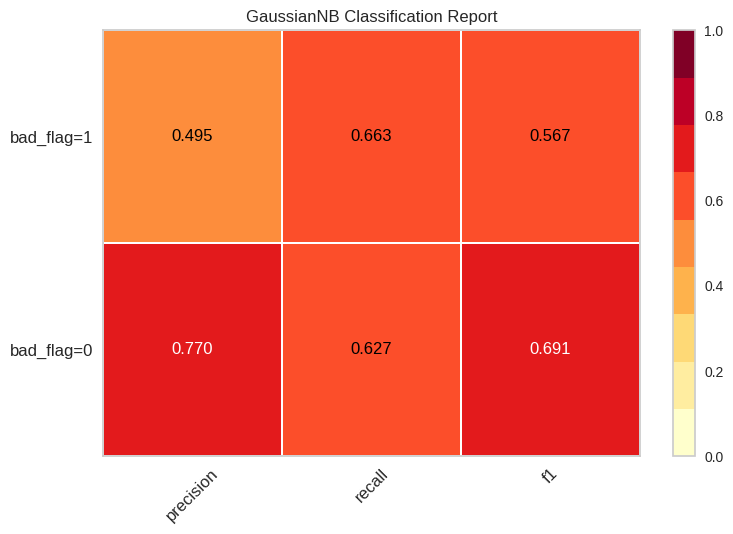

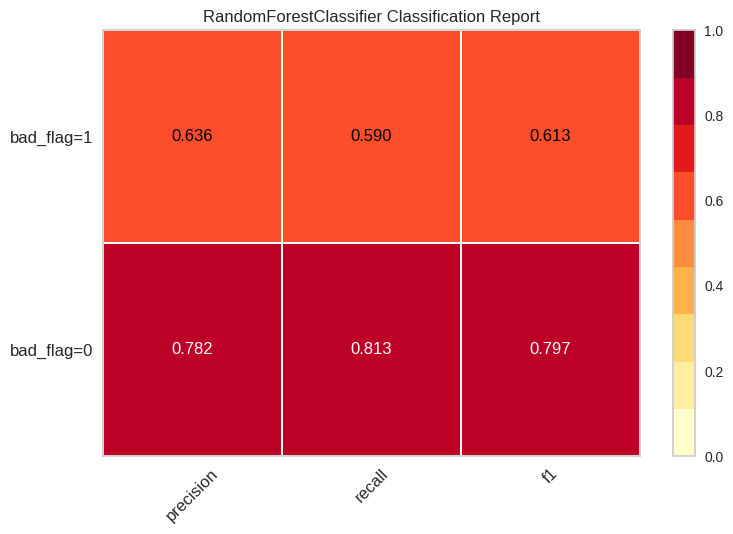

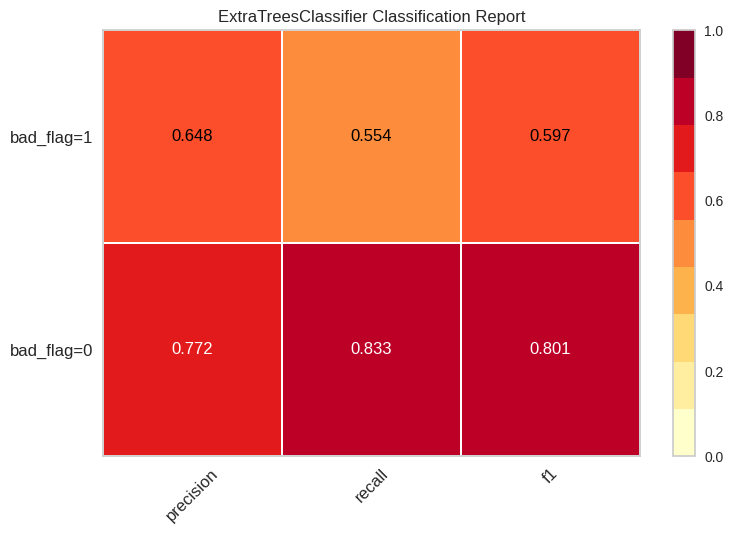

In [34]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

Class Weights

In [38]:
classifiers_cw = [
    SGDClassifier(class_weight='balanced',max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
    KNeighborsClassifier(),
    LogisticRegression(class_weight='balanced',max_iter=2000, random_state=RANDOM_SEED),
    LogisticRegressionCV(class_weight='balanced',cv=3,max_iter=2000, random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=RANDOM_SEED),
    ExtraTreesClassifier(class_weight='balanced',n_estimators=100, random_state=RANDOM_SEED)
]

In [39]:
for classifier in classifiers_cw:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.26785714285714285
KNeighborsClassifier : 0.6211180124223602
LogisticRegression : 0.5921787709497207
LogisticRegressionCV : 0.6021505376344086
BaggingClassifier : 0.5769230769230769
GaussianNB : 0.42953020134228187
RandomForestClassifier : 0.5882352941176471
ExtraTreesClassifier : 0.6052631578947368


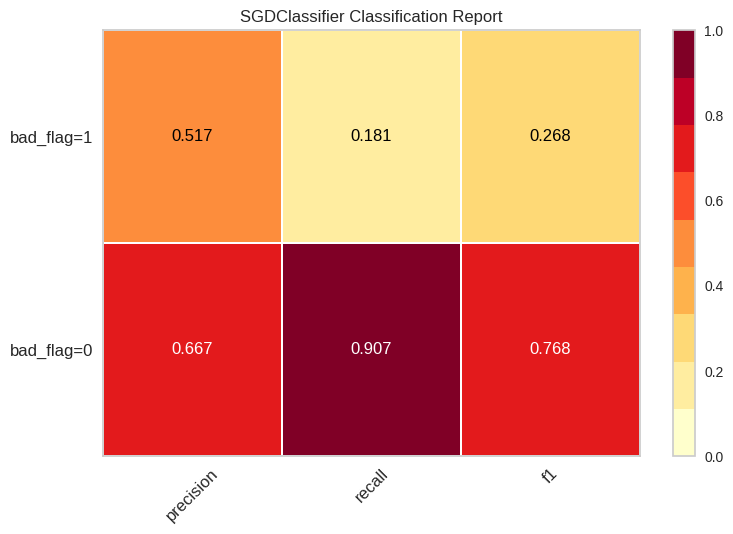

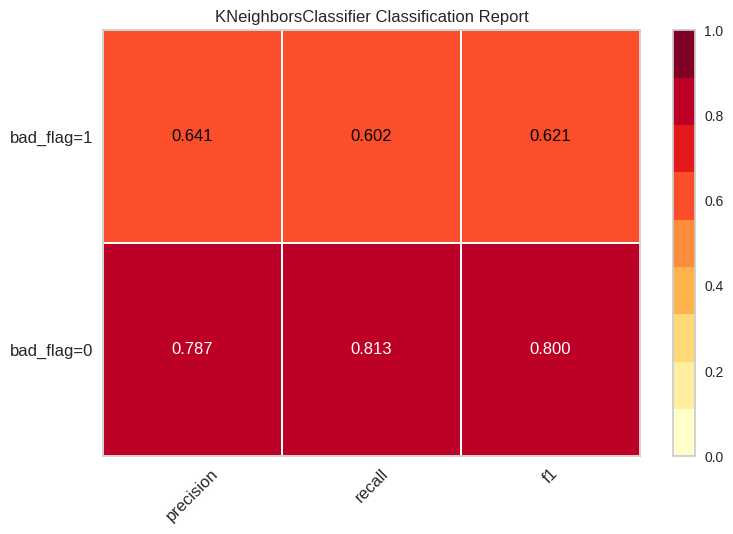

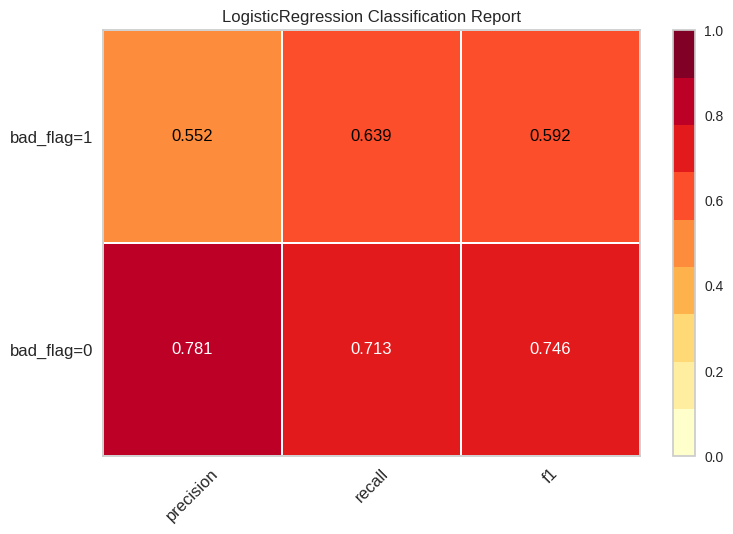

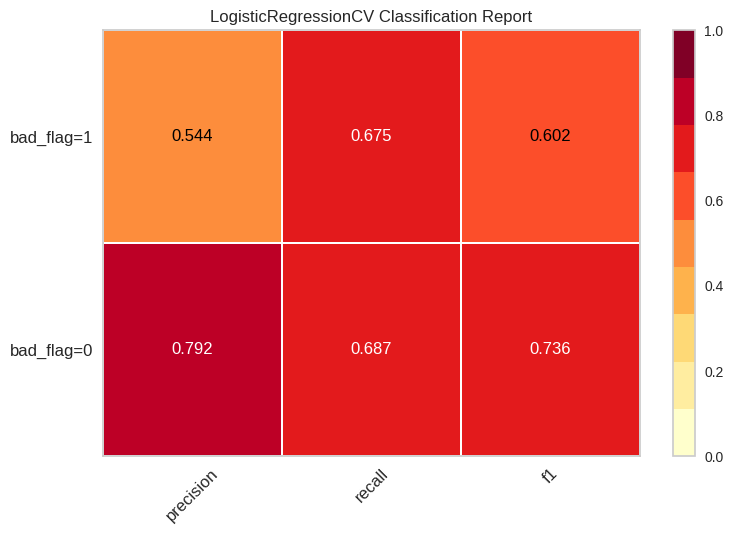

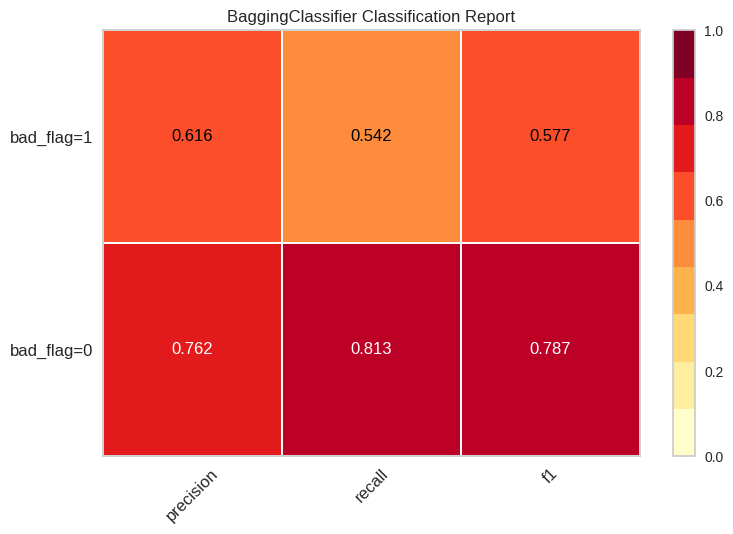

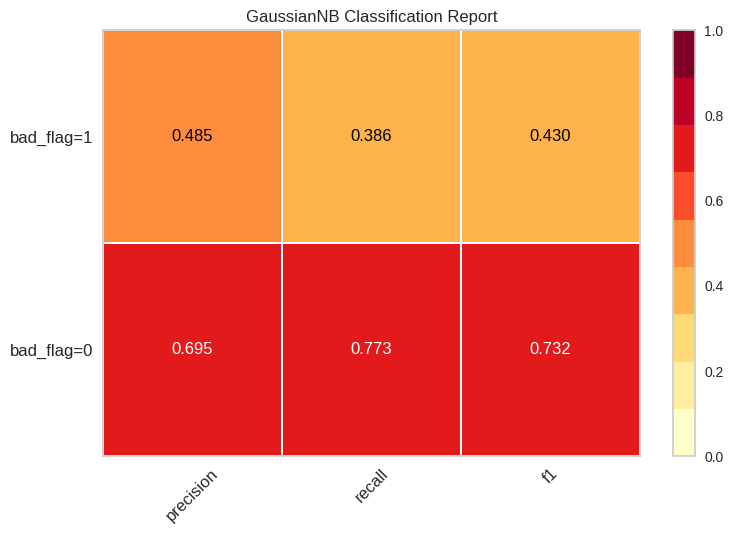

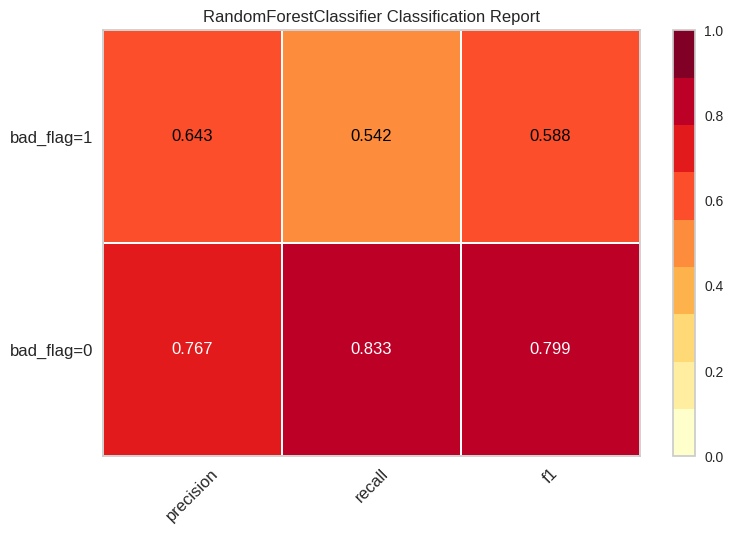

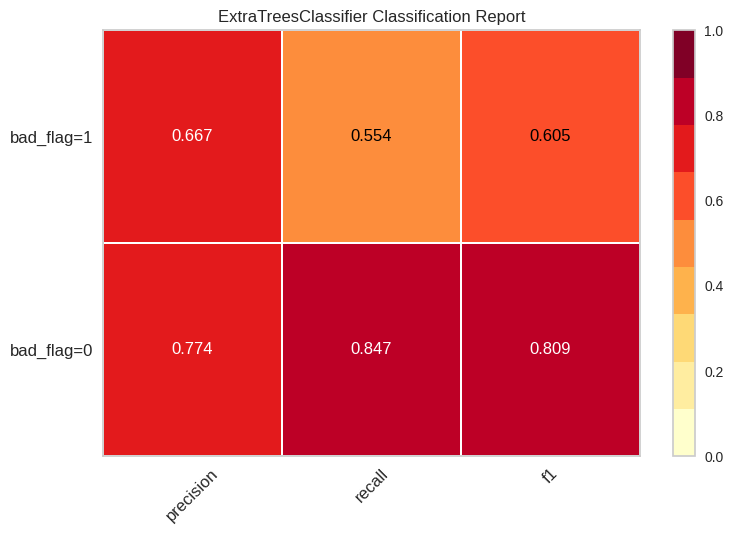

In [40]:
for classifier in classifiers_cw:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

UnderSampling: KNN performed well

SMOTE: Decision Tree Classifer

Class Weights: KNN

Will do hyperparamter thuning for KNN , Random forest and see which performs better


OPTUNA:

Optuna is an automatic hyperparameter optimization framework. It uses intelligent search (like Bayesian optimization and Tree-structured Parzen Estimators) to find the best hyperparameters faster and more efficiently than GridSearchCV or RandomizedSearchCV.

In [41]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 17.5 MB/s eta 0:00:00


In [42]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score

# Define objective function
def objective(trial):
    # Hyperparameters to search
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        class_weight='balanced',
        random_state=42
    )

    score = cross_val_score(clf, X_train, y_train, scoring="f1", cv=3)
    return score.mean()

# Run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best results
print("Best trial:")
print(study.best_trial)


[I 2025-07-09 01:55:55,578] A new study created in memory with name: no-name-33a74840-9c8c-4381-a241-0ef35c553e78
[I 2025-07-09 01:55:57,130] Trial 0 finished with value: 0.6251772654712848 and parameters: {'n_estimators': 56, 'max_depth': 12, 'min_samples_split': 7}. Best is trial 0 with value: 0.6251772654712848.
[I 2025-07-09 01:55:59,817] Trial 1 finished with value: 0.6288705647446751 and parameters: {'n_estimators': 71, 'max_depth': 11, 'min_samples_split': 8}. Best is trial 1 with value: 0.6288705647446751.
[I 2025-07-09 01:56:07,564] Trial 2 finished with value: 0.6461221912326792 and parameters: {'n_estimators': 258, 'max_depth': 17, 'min_samples_split': 9}. Best is trial 2 with value: 0.6461221912326792.
[I 2025-07-09 01:56:13,595] Trial 3 finished with value: 0.639261673722728 and parameters: {'n_estimators': 268, 'max_depth': 12, 'min_samples_split': 6}. Best is trial 2 with value: 0.6461221912326792.
[I 2025-07-09 01:56:16,956] Trial 4 finished with value: 0.63912067942441

Best trial:
FrozenTrial(number=41, state=1, values=[0.6694814673158903], datetime_start=datetime.datetime(2025, 7, 9, 1, 57, 22, 442508), datetime_complete=datetime.datetime(2025, 7, 9, 1, 57, 23, 742998), params={'n_estimators': 236, 'max_depth': 3, 'min_samples_split': 7}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'max_depth': IntDistribution(high=20, log=False, low=3, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=41, value=None)


In [43]:
def objective(trial: optuna.Trial):
    """The objective function that we will try to maximize."""
    # suggest min. and max. values for the parameters that we want to tune
    n_neighbors = trial.suggest_int(name="n_neighbors", low=1, high=10)
    weights = trial.suggest_categorical(name="weights", choices=["uniform", "distance"])
    algorithm = trial.suggest_categorical(name="algorithm", choices=["ball_tree", "kd_tree", "brute"])
    leaf_size = trial.suggest_int(name="leaf_size", low=1, high=40)
    p = trial.suggest_categorical(name="p", choices=[1, 2])

    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p)

    classifier = classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    return f1_score(y_true=y_test, y_pred=y_pred)

In [44]:
# make the sampler behave in a deterministic way.
sampler = optuna.samplers.TPESampler(seed=RANDOM_SEED)
study = optuna.create_study(direction='maximize', study_name="KNeigbors", sampler=sampler)
study.optimize(objective, n_trials=30)

[I 2025-07-09 01:59:43,344] A new study created in memory with name: KNeigbors
[I 2025-07-09 01:59:43,470] Trial 0 finished with value: 0.5594405594405595 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 3, 'p': 1}. Best is trial 0 with value: 0.5594405594405595.
[I 2025-07-09 01:59:43,531] Trial 1 finished with value: 0.5974025974025974 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 8, 'p': 2}. Best is trial 1 with value: 0.5974025974025974.
[I 2025-07-09 01:59:43,607] Trial 2 finished with value: 0.6163522012578616 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 19, 'p': 1}. Best is trial 2 with value: 0.6163522012578616.
[I 2025-07-09 01:59:43,701] Trial 3 finished with value: 0.5594405594405595 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 38, 'p': 1}. Best is trial 2 with value: 0.61635220125

In [45]:
study.best_params

{'n_neighbors': 5,
 'weights': 'uniform',
 'algorithm': 'brute',
 'leaf_size': 29,
 'p': 1}

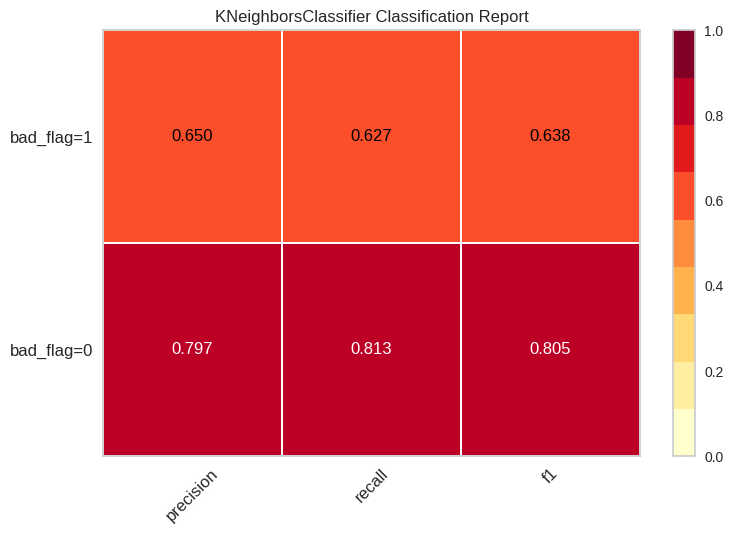

In [46]:
visualizer = ClassificationReport(KNeighborsClassifier(**study.best_params), classes=["bad_flag=0", "bad_flag=1"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
_ = visualizer.show()

#ROC-AUC curve for RandomForest Clasiifier

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [49]:
# Fit the best model (example with RandomForest)
best_model = RandomForestClassifier(
    n_estimators=236,
    max_depth=3,
    min_samples_split=7,
    class_weight='balanced',
    random_state=42
)

best_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=7, n_estimators=236, random_state=42)

In [50]:
# Get predicted probabilities for the positive class
y_probs = best_model.predict_proba(X_test)[:, 1]


In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)


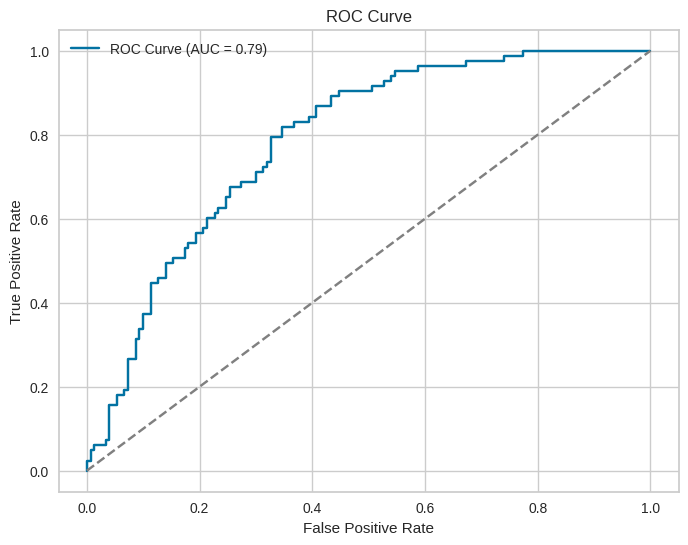

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


#ROC-AUC curve for KNN Classifier

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Get predicted probabilities for class 1 (bad_flag = 1)
y_probs_knn = knn.predict_proba(X_test)[:, 1]



In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_knn)
roc_auc = roc_auc_score(y_test, y_probs_knn)

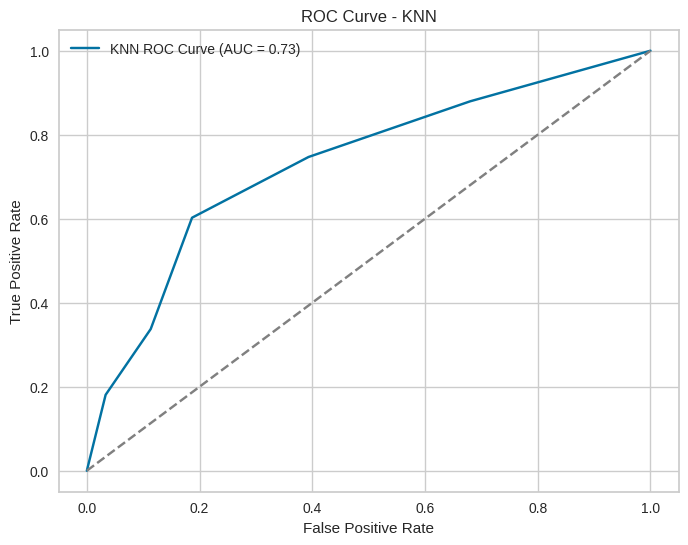

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.grid(True)
plt.show()
